In [1]:
xs = [x / 10.0 for x in range(-50, 50)]

In [2]:
from matplotlib import pyplot as plt

In [3]:
def uniform_pdf(x):
    return 1 if x > 0 and x < 1 else 0

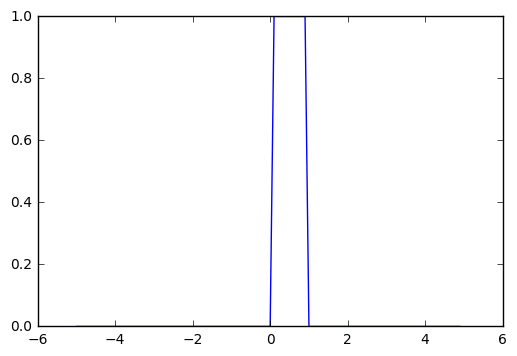

In [4]:
plt.plot(xs, [uniform_pdf(x) for x in xs])
plt.show()

In [5]:
def uniform_cdf(x):
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1

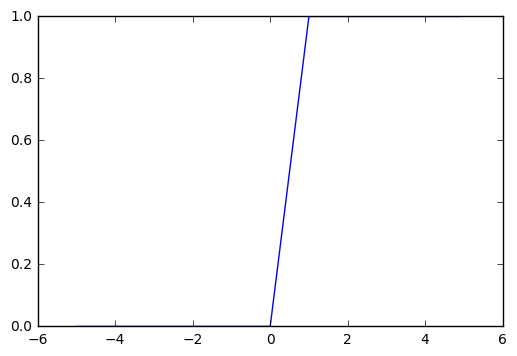

In [6]:
plt.plot(xs, [uniform_cdf(x) for x in xs])
plt.show()

In [7]:
from math import sqrt, pi, exp, erf

In [8]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = sqrt(2* pi)
    return (exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

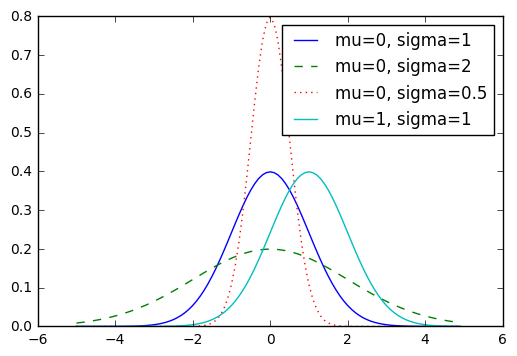

In [9]:
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=1) for x in xs], '-', label='mu=1, sigma=1')
plt.legend()
plt.show()

In [10]:
def normal_cdf(x, mu=0, sigma=1):
    sqrt_two_pi = sqrt(2* pi)
    return (1 + erf((x - mu) / sqrt(2) / sigma)) / 2

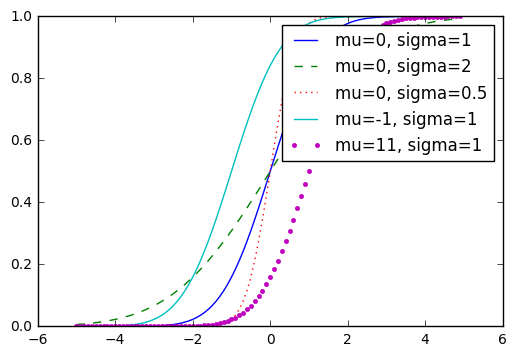

In [11]:
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.plot(xs, [normal_cdf(x, mu=1) for x in xs], '.', label='mu=11, sigma=1')
plt.legend()
plt.show()

In [25]:
def inverse_normal_cdf(x, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(x, tolerance=tolerance)
    
    low_z = -10.0
    high_z = 10.0
    
    while high_z - low_z > tolerance:
        mid_z = (low_z + high_z) / 2
        mid_x = normal_cdf(mid_z)
        if mid_x < x:
            low_z = mid_z
        elif mid_x > x:
            high_z = mid_z
        else:
            break
           
    return mid_z

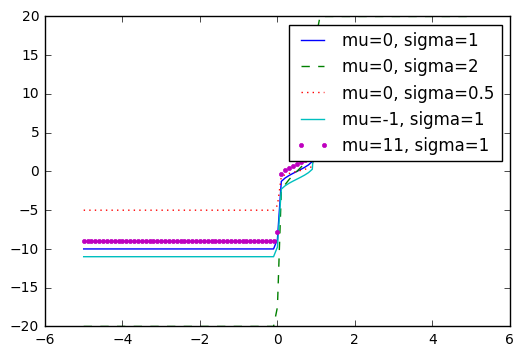

In [27]:
plt.plot(xs, [inverse_normal_cdf(x) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [inverse_normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [inverse_normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [inverse_normal_cdf(x, mu=-1) for x in xs], '-', label='mu=-1, sigma=1')
plt.plot(xs, [inverse_normal_cdf(x, mu=1) for x in xs], '.', label='mu=11, sigma=1')
plt.legend()
plt.show()

In [28]:
import random

In [31]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [39]:
for i in range(10):
    print(bernoulli_trial(0.5))

0 0
1 0
2 0
3 0
4 0
5 1
6 1
7 0
8 1
9 1


In [40]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [41]:
for i in range(10):
    print(binomial(10, 0.5))

4
4
6
7
5
2
3
5
4
6


In [45]:
from collections import Counter

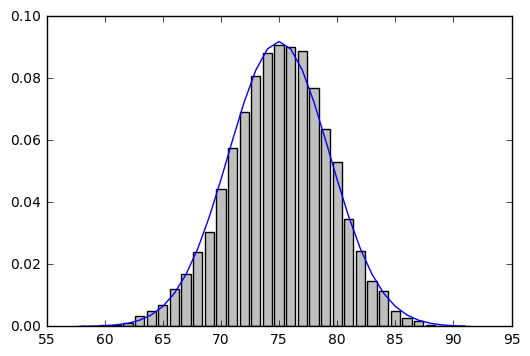

In [49]:
p = 0.75
n = 100
num_points = 10000

data = [binomial(n, p) for _ in range(num_points)]

histogram = Counter(data)
plt.bar(
    [x - 0.4 for x in histogram.keys()],
    [v / num_points for v in histogram.values()],
    0.8,
    color='0.75'
)

mu = p*n
sigma = sqrt(n * p * (1 - p))

xs = range(min(data), max(data) + 1)
ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
plt.plot(xs, ys)
plt.show()